<a href="https://colab.research.google.com/github/saurabhforgoogle/begineer-machine-learning-and-data-analysis/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import os
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
Data_Path="/content/drive/MyDrive/Datasets/cifar-100"

In [ ]:


file1=unpickle(os.path.join(Data_Path,'train'))
file2=unpickle(os.path.join(Data_Path,'test'))

In [ ]:
label_map=unpickle(os.path.join(Data_Path,'meta'))

In [ ]:
labels=(label_map[b'fine_label_names'])

In [ ]:
raw_training_data=file1[b'data'].reshape(50000,3,32,32)
raw_test_data=(file2[b'data'].reshape(10000,3,32,32))
y_train=file1[ b'fine_labels']
y_test=file2[ b'fine_labels']

In [ ]:
X_train=np.empty((50000,32,32,3),dtype=int)
for i in range(X_train.shape[0]):
    img=np.dstack((raw_training_data[i][0],raw_training_data[i][1],raw_training_data[i][2]))
    X_train[i]=img

In [ ]:
X_test=np.empty((10000,32,32,3),dtype=int)
for i in range(X_test.shape[0]):
    img=np.dstack((raw_test_data[i][0],raw_test_data[i][1],raw_test_data[i][2]))
    X_test[i]=img

b'dinosaur'


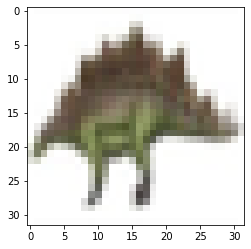

In [ ]:
plt.imshow(X_train[1])
print(labels[y_train[1]])
plt.show()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]#contains label map

array([19, 29,  0, 11,  1])

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255.0
X_test /= 255.0

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)
Y_train=to_categorical(y_train, 100)
Y_test = to_categorical(y_test, 100)

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128,(1,1),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256,(1,1),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=30)
#train till 30epoch

Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 3.8381 - accuracy: 0.1139 - val_loss: 3.4096 - val_accuracy: 0.1878
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1956 - accuracy: 0.2247 - val_loss: 2.9736 - val_accuracy: 0.2768
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8702 - accuracy: 0.2881 - val_loss: 2.7678 - val_accuracy: 0.3125
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6532 - accuracy: 0.3331 - val_loss: 2.5982 - val_accuracy: 0.3525
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4853 - accuracy: 0.3674 - val_loss: 2.6312 - val_accuracy: 0.3423
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3494 - accuracy: 0.3978 - val_loss: 2.3993 - val_accuracy: 0.3870
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2379 - accuracy: 0.4209 - val_loss: 2.3696 - val_accuracy:

In [ ]:
model.save('CIFAR100.h5')


# **Model Has been trained , Opening model for further testing**

In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/Datasets/cifar-100/CIFAR100.h5')

In [ ]:
ImagesPath="/content/drive/MyDrive/Datasets/cifar-100/TestImages"
ImageNames=os.listdir(ImagesPath)
ImageNames

['Cow.jpg',
 'tractor.jpg',
 'Rocket.jpg',
 'Cycle.jpg',
 'Boy.jpg',
 'Mountains.jpg',
 'Plates.jpg',
 'Mushrooms.jpg']

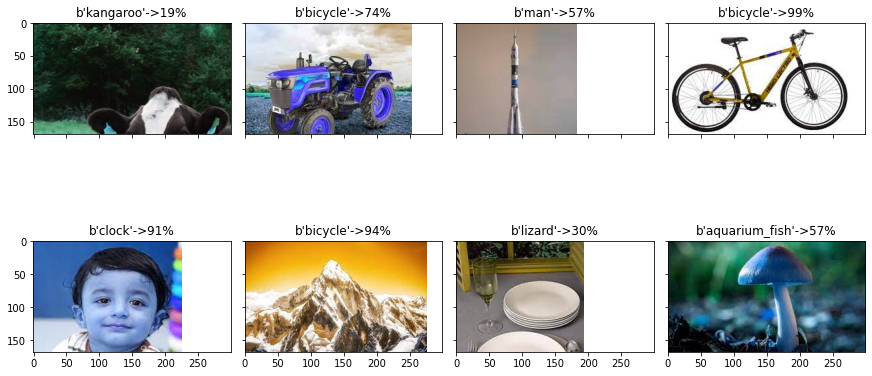

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=4,sharex=True,sharey=True,constrained_layout=True,figsize=(12,6))
index=0
for axes in ax:
    for axis in axes:
        image=cv2.imread(os.path.join(ImagesPath,ImageNames[index]))
        resizeImage=cv2.resize(image,(32,32))
        resizeImage=resizeImage.astype(float)
        resizeImage/=255.0
        resizeImage=resizeImage.reshape(1,32,32,3)
        PredictedVal=model.predict([resizeImage])
        labelPred=labels[np.where(PredictedVal[0]==np.max(PredictedVal[0]))[0][0]]
        Chance=np.max(PredictedVal[0])
        axis.set_title('{}->{}%'.format(labelPred,int(Chance*100)))
        index+=1
        axis.imshow(image)
plt.show()